In [1]:
# Importing the libraries which are useful
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Loading the IRIS dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
# Creating the the dataset target column
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [10]:
#Reading first five columns of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
i# Target variable
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# values in the Targetg column
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
# Change target to target_names & merge with main dataframe
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['species'].head()


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [15]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


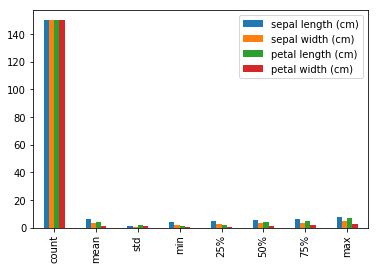

In [17]:
df.describe().plot.bar()

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

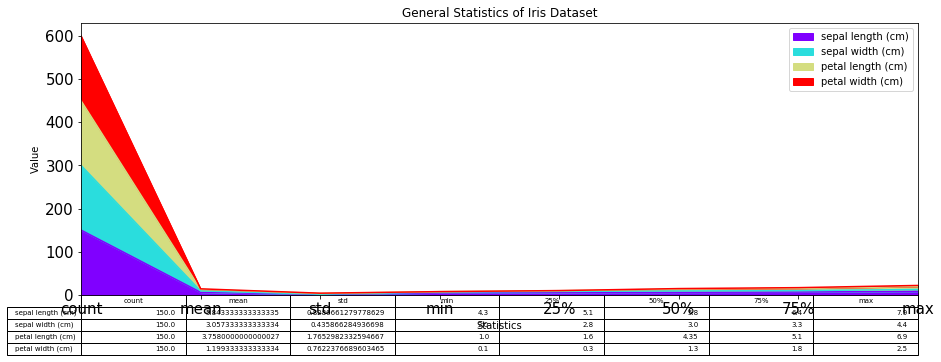

In [23]:
df.describe().plot(kind = "area",fontsize=15, figsize = (15,5), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

### 2.Bar Plot : Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset

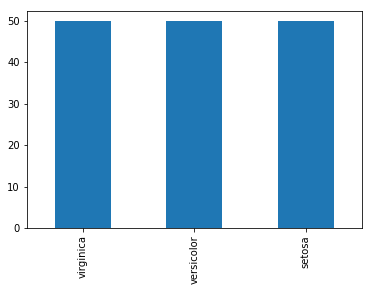

In [25]:
df['species'].value_counts().plot.bar()

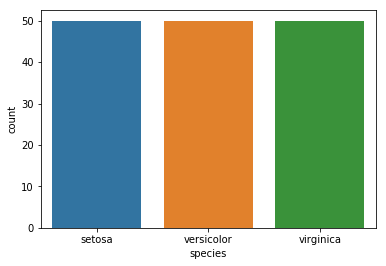

In [28]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('species',data=df)
#ax.set_title('Iris Species Count')
plt.show()


### 3. Pie Chart :

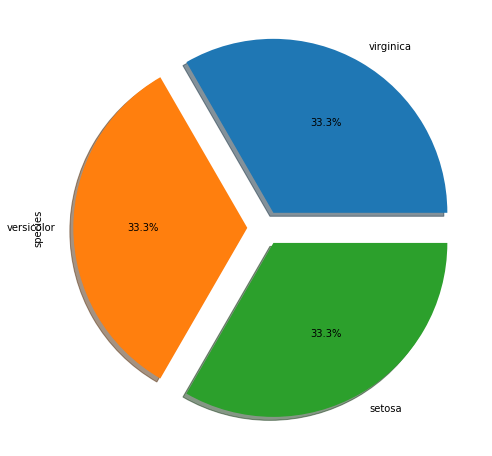

In [30]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
#iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('Iris Species Count')
#ax[0].set_ylabel('Count')
#sns.countplot('Species',data=iris,ax=ax[1])
#ax[1].set_title('Iris Species Count')
plt.show()

### 4. Joint plot: Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

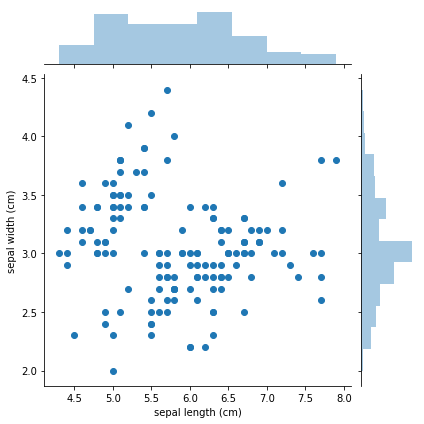

In [32]:
fig = sns.jointplot(x= df['sepal length (cm)'],y=df['sepal width (cm)'])

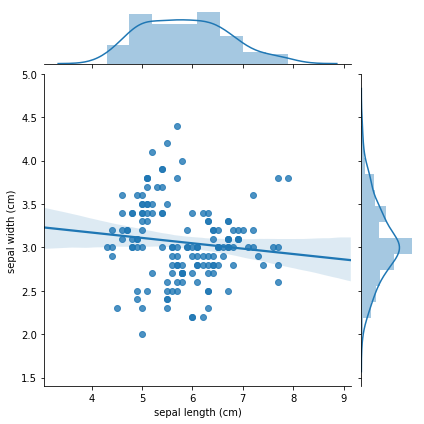

In [33]:
fig = sns.jointplot(x= df['sepal length (cm)'],y=df['sepal width (cm)'],kind = 'reg')

### 5. FacetGrid Plot

C:\Users\kiran kumar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


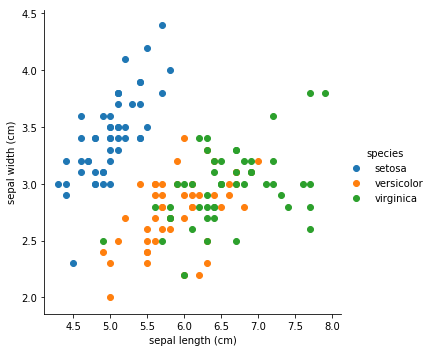

In [40]:
sns.FacetGrid(df,hue='species',size=5).map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()


#### 6. Boxplot or Whisker plot Box plot was was first introduced in year 1969 by Mathematician John Tukey.Box plot give a statical summary of the features being plotted.Top line represent the max value,top edge of box is third Quartile, middle edge represents the median,bottom edge represents the first quartile value.The bottom most line respresent the minimum value of the feature.The height of the box is called as Interquartile range.The black dots on the plot represent the outlier values in the data.

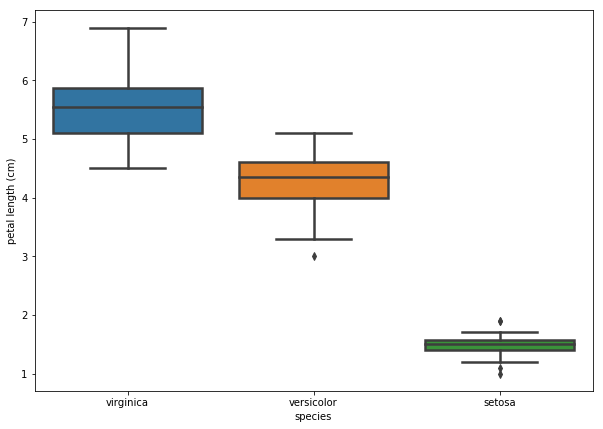

In [45]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species',y='petal length (cm)',data=df,order=['virginica','versicolor','setosa'],linewidth=2.5,orient='v',dodge=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225DCCDBFD0>,
      dtype=object)

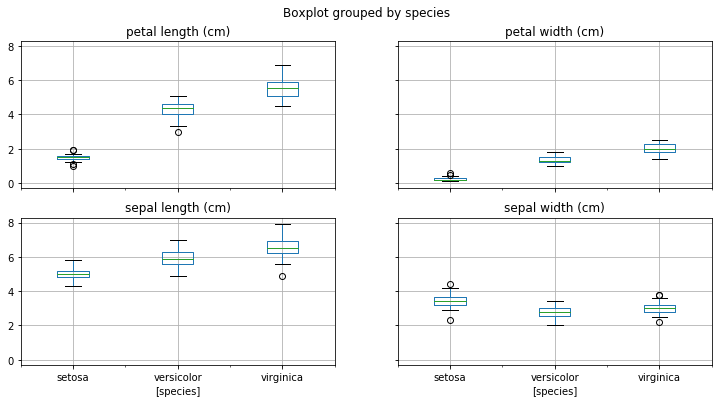

In [46]:
df.boxplot(by="species", figsize=(12, 6))

### 7. Strip plot

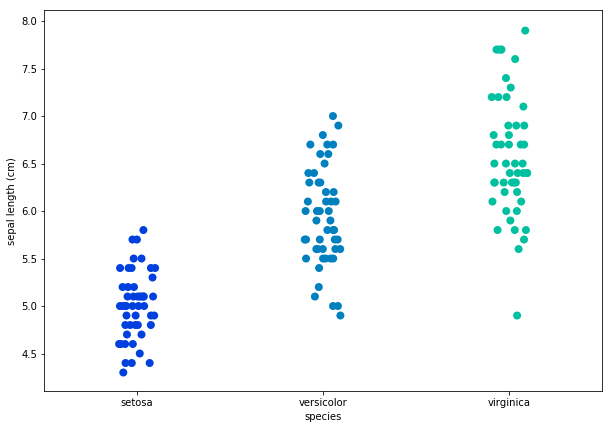

In [47]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='species',y='sepal length (cm)',data=df,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

### 8. Combining Box and Strip Plots

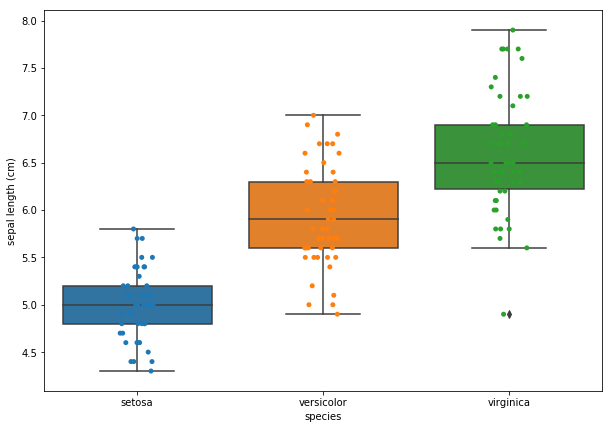

In [48]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species',y='sepal length (cm)',data=df)
fig=sns.stripplot(x='species',y='sepal length (cm)',data=df,jitter=True,edgecolor='gray')

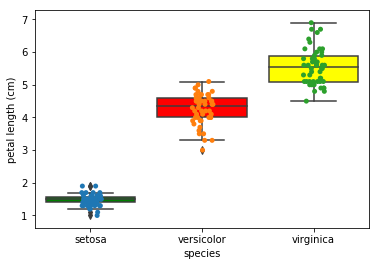

In [51]:
ax= sns.boxplot(x="species", y="petal length (cm)", data=df)
ax= sns.stripplot(x="species", y="petal length (cm)", data=df, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('yellow')
#boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('red')
#boxthree.set_edgecolor('black')
boxthree=ax.artists[0]
boxthree.set_facecolor('green')
#boxthree.set_edgecolor('black')

#### 9. Violin Plot It is used to visualize the distribution of data and its probability distribution.This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.Box Plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed

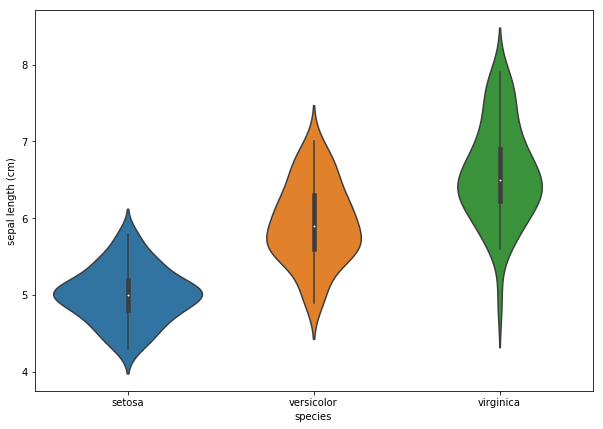

In [52]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='species',y='sepal length (cm)',data=df)


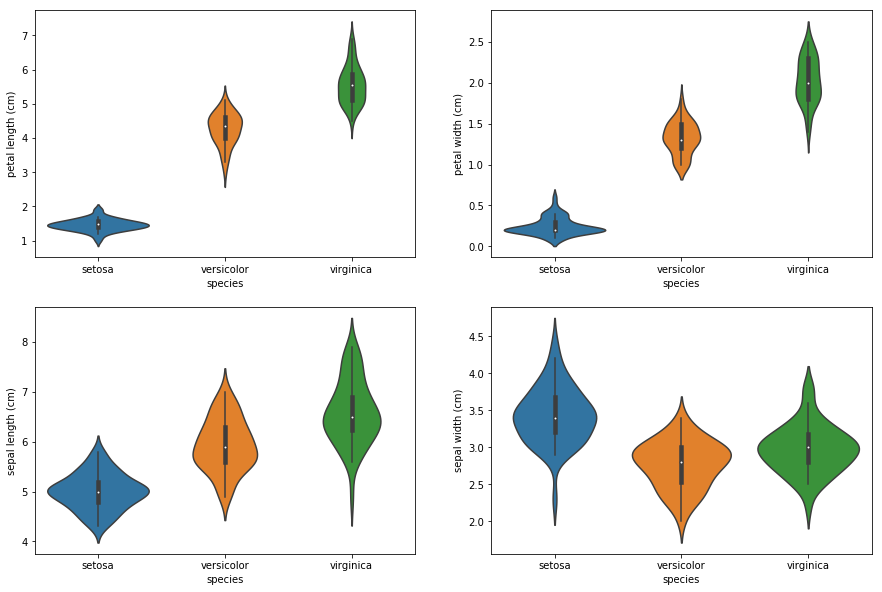

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal length (cm)',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal width (cm)',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal length (cm)',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal width (cm)',data=df)

#### 10. Pair Plot: A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

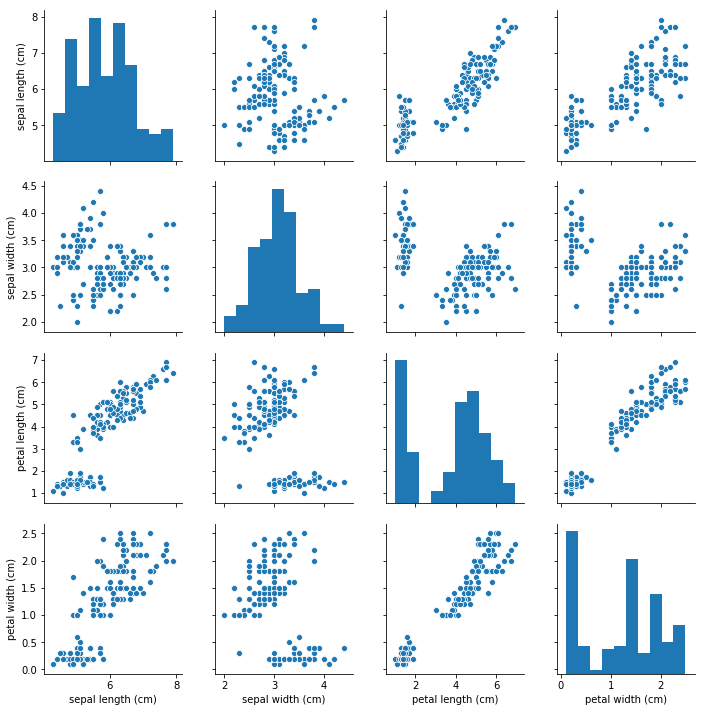

In [54]:
sns.pairplot(data=df,kind='scatter')

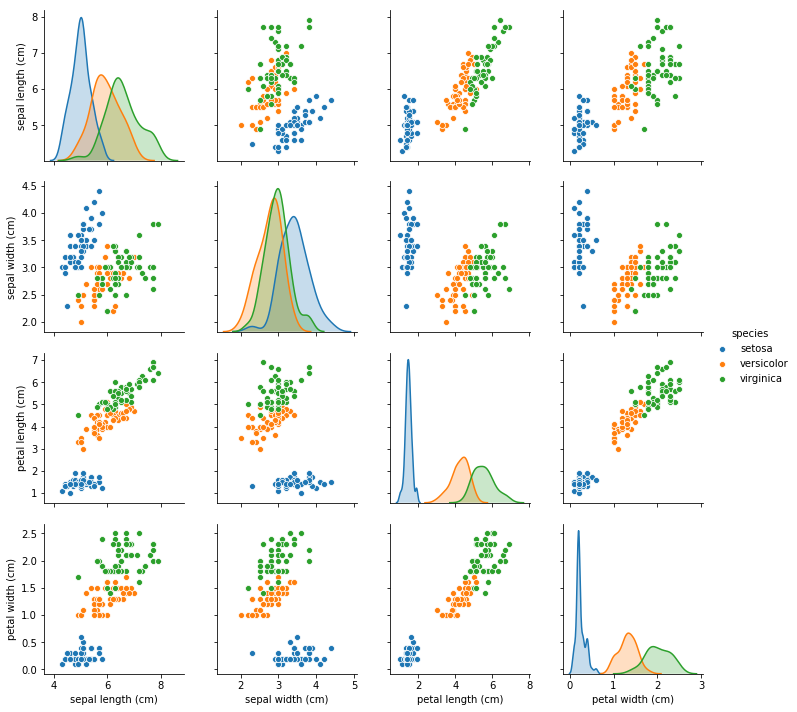

In [55]:
sns.pairplot(df,hue='species')


#### 11. Heat map:
Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

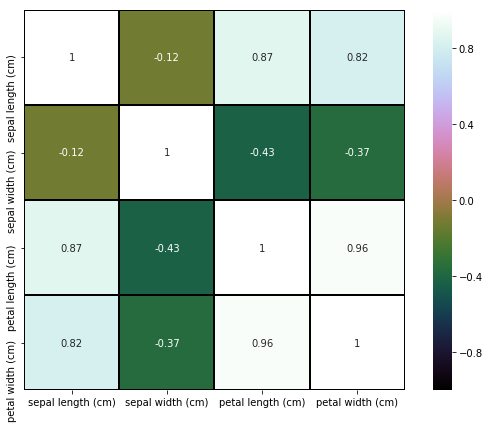

In [56]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


### 12. Distribution plot: 
**The distribution plot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis. You can choose to display only the value points to see the distribution of values, a bounding box to see the range of values, or a combination of both as shown here.The distribution plot is not relevant for detailed analysis of the data as it deals with a summary of the data distribution.**

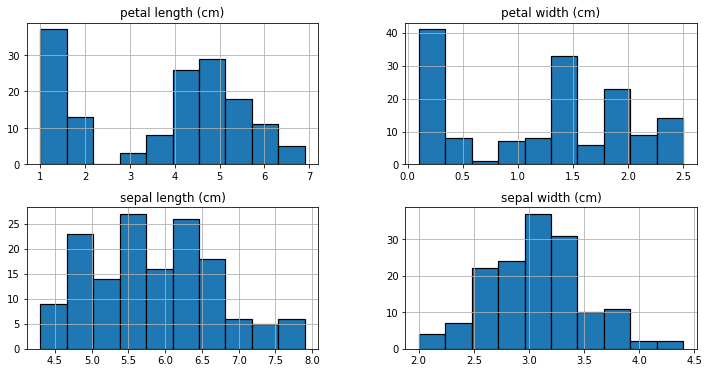

In [57]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)


### 13. Swarm plot: 
It looks a bit like a friendly swarm of bees buzzing about their hive. More importantly, each data point is clearly visible and no data are obscured by overplotting.A beeswarm plot improves upon the random jittering approach to move data points the minimum distance away from one another to avoid overlays. The result is a plot where you can see each distinct data point, like shown in below plot



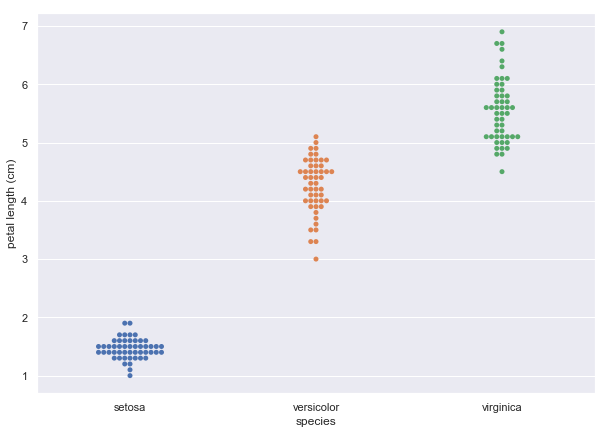

In [58]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="species", y="petal length (cm)", data=df)

### 14. Box and Swarm plot combined

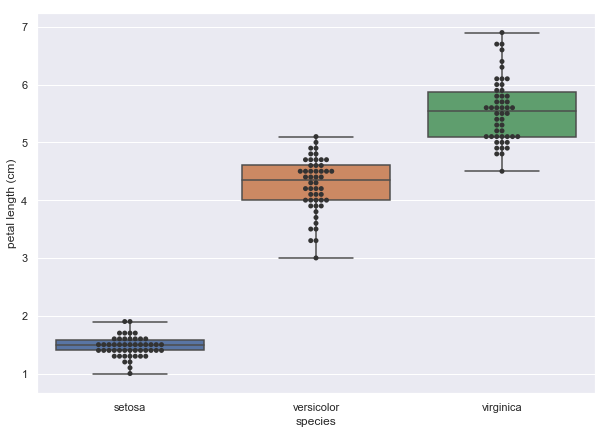

In [59]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x="species", y="petal length (cm)", data=df, whis=np.inf)
fig= sns.swarmplot(x="species", y="petal length (cm)", data=df, color=".2")


### 15. Swarm and Violin plot combined

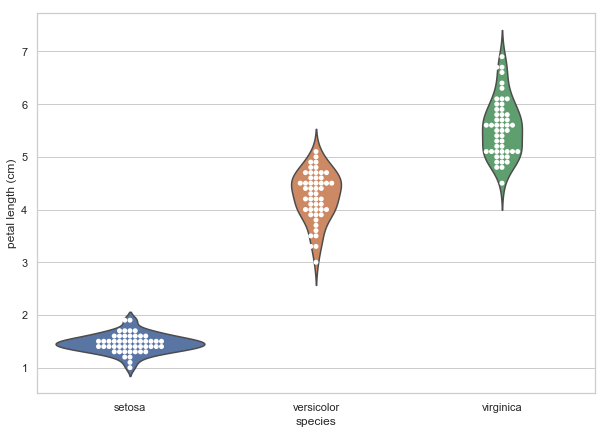

In [60]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="species", y="petal length (cm)", data=df, inner=None)
ax = sns.swarmplot(x="species", y="petal length (cm)", data=df,color="white", edgecolor="black")

### 16. Species based classification

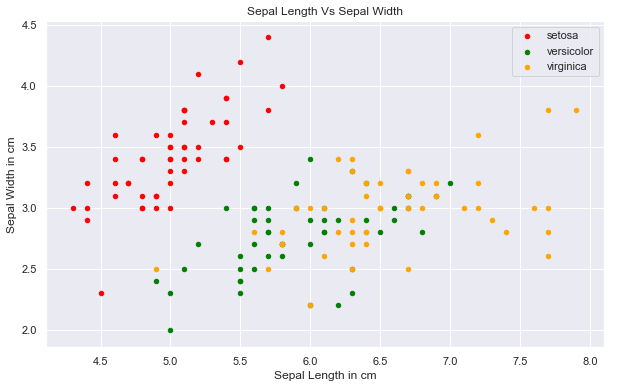

In [62]:
sns.set(style="darkgrid")
sc=df[df.species=='setosa'].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='red',label='setosa')
df[df.species=='versicolor'].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='green',label='versicolor',ax=sc)
df[df.species=='virginica'].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='orange', label='virginica', ax=sc)
sc.set_xlabel('Sepal Length in cm')
sc.set_ylabel('Sepal Width in cm')
sc.set_title('Sepal Length Vs Sepal Width')
sc=plt.gcf()
sc.set_size_inches(10,6)


### 17. LM PLot

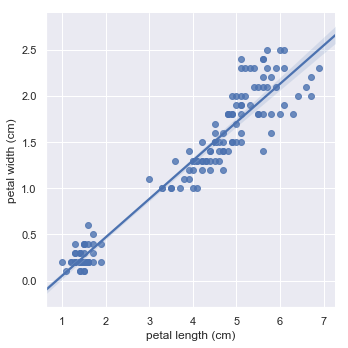

In [63]:
fig=sns.lmplot(x="petal length (cm)", y="petal width (cm)",data=df)

### 18. FacetGrid

C:\Users\kiran kumar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


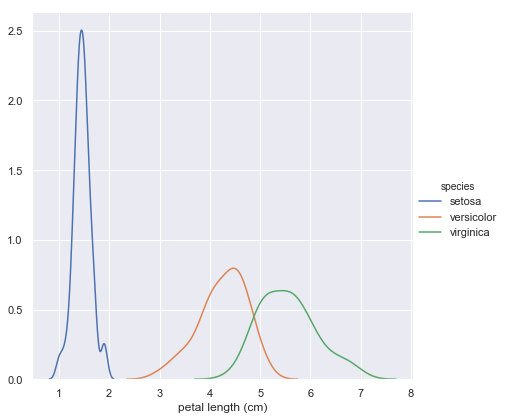

In [64]:
sns.FacetGrid(df, hue="species", size=6) \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()
plt.ioff() 


### 19.Distplot: 
    It helps us to look at the distribution of a single variable.Kde shows the density of the distribution

TypeError: unsupported operand type(s) for /: 'str' and 'int'

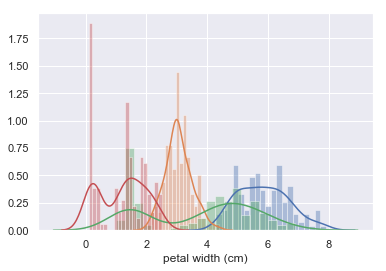

In [70]:
for col in df.columns:
    sns.distplot(df[col],kde=True,bins=20)

#### Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

#### Steps To Be followed When Applying an Algorithm
1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3. Then pass the training dataset to the algorithm to train it. We use the .fit() method
4. Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
5. We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting The Data into Training And Testing Dataset


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [73]:
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # taking test data features
test_y =test.species   #output value of test data

In [80]:

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

### Support Vector Machine (SVM)

In [85]:
model_svm = svm.SVC() #select the algorithm
model_svm.fit(train_X,train_y) # we train the algorithm with the training data and the training output
svm_prediction=model_svm.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(svm_prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


### Logistic Regression

In [84]:
model_log = LogisticRegression()
model_log.fit(train_X,train_y)
log_prediction=model_log.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(log_prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


### Decision Tree

In [83]:
model_tree=DecisionTreeClassifier()
model_tree.fit(train_X,train_y)
tree_prediction=model_tree.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(tree_prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


### K-Nearest Neighbours

In [86]:
model_knn=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model_knn.fit(train_X,train_y)
knn_prediction=model_knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(knn_prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


### Random Forest

In [96]:
model_rf=RandomForestClassifier() #this examines 3 neighbours for putting the new data into a class
model_rf.fit(train_X,train_y)
rf_prediction=model_rf.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(rf_prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


#### Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x225e208b240>,
 <a list of 10 Text xticklabel objects>)

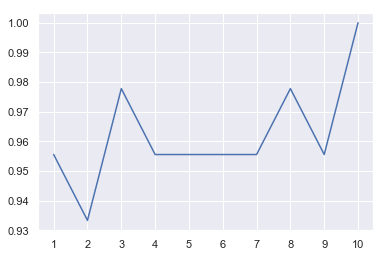

In [87]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model_knn=KNeighborsClassifier(n_neighbors=i) 
    model_knn.fit(train_X,train_y)
    knn_prediction=model_knn.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(knn_prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)


### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

#### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [88]:
petal=df[['petal length (cm)','petal width (cm)','species']]
sepal=df[['sepal length (cm)','sepal width (cm)','species']]


In [89]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p.drop('species',axis = 1)
train_y_p=train_p.species
test_x_p=test_p.drop('species',axis = 1)
test_y_p=test_p.species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s.drop('species',axis = 1)
train_y_s=train_s.species
test_x_s=test_s.drop('species',axis = 1)
test_y_s=test_s.species

### SVM

In [91]:
model_svm=svm.SVC()
model_svm.fit(train_x_p,train_y_p) 
svm_p_prediction=model_svm.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(svm_p_prediction,test_y_p))

model_svm.fit(train_x_s,train_y_s) 
svm_s_prediction=model_svm.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(svm_s_prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [92]:
model_log = LogisticRegression()
model_log.fit(train_x_p,train_y_p) 
log_p_prediction=model_log.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(log_p_prediction,test_y_p))

model_log.fit(train_x_s,train_y_s) 
log_s_prediction=model_log.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(log_s_prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [93]:
model_tree=DecisionTreeClassifier()
model_tree.fit(train_x_p,train_y_p) 
tree_p_prediction=model_tree.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(tree_p_prediction,test_y_p))

model_tree.fit(train_x_s,train_y_s) 
tree_s_prediction=model_tree.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(tree_s_prediction,test_y_s))


The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


### K-Nearest Neighbours

In [94]:
model_knn=KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(train_x_p,train_y_p) 
knn_p_prediction=model_knn.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(knn_p_prediction,test_y_p))

model_knn.fit(train_x_s,train_y_s) 
knn_s_prediction=model_knn.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(knn_s_prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


**Observations:**
- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high

### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier() 
model_rf.fit(train_x_p,train_y_p) 
rf_p_prediction=model_rf.predict(test_x_p) 
print('The accuracy of the RandomForest using Petals is:',metrics.accuracy_score(rf_p_prediction,test_y_p))

model_rf.fit(train_x_s,train_y_s) 
rf_s_prediction=model_rf.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(rf_s_prediction,test_y_s))

The accuracy of the RandomForest using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.6444444444444445
